## Import Necessary Libraries

In [84]:
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset
### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
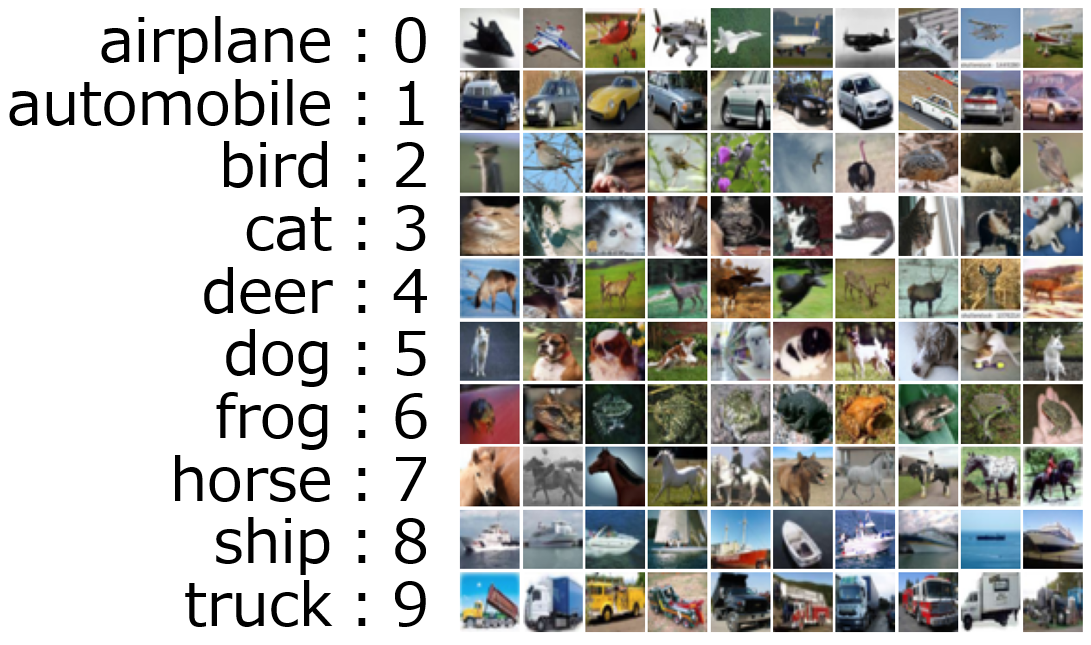

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Reshape

In [16]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
Classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Observation

In [28]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(Classes[y[index]])

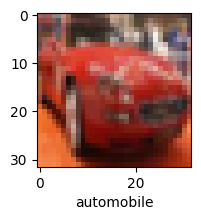

In [29]:
plot_sample(X_train,y_train,5)

## Normalization

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Build Model

In [42]:
my_model = Sequential()

my_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Flatten())
my_model.add(Dense(units=64, activation='relu'))
my_model.add(Dense(units=10, activation='softmax'))

## Compile Model

In [43]:
my_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [45]:
my_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4639 - accuracy: 0.4740 - val_loss: 1.2279 - val_accuracy: 0.5593
Epoch 2/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0918 - accuracy: 0.6160 - val_loss: 1.0356 - val_accuracy: 0.6384
Epoch 3/5
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9518 - accuracy: 0.6668 - val_loss: 1.0078 - val_accuracy: 0.6501
Epoch 4/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8676 - accuracy: 0.6966 - val_loss: 0.9267 - val_accuracy: 0.6815
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7960 - accuracy: 0.7230 - val_loss: 0.8672 - val_accuracy: 0.7029


## Make Predictions

In [76]:
y_pred = my_model.predict(X_test)

313/313 [==============================] - 4s 14ms/step


In [77]:
y_pred[5]

array([6.2227558e-04, 7.7074388e-04, 7.6165218e-03, 2.0220189e-01,
       1.6873956e-02, 4.7535919e-02, 7.1984667e-01, 3.1011489e-03,
       9.1783982e-04, 5.1303499e-04], dtype=float32)

In [78]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred

[3,
 8,
 8,
 8,
 4,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 5,
 7,
 9,
 6,
 5,
 3,
 8,
 6,
 7,
 0,
 0,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 4,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 3,
 7,
 4,
 0,
 0,
 6,
 3,
 8,
 8,
 7,
 3,
 3,
 3,
 7,
 5,
 4,
 0,
 6,
 2,
 1,
 0,
 3,
 9,
 2,
 3,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 4,
 8,
 8,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 8,
 6,
 8,
 5,
 7,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 3,
 5,
 8,
 3,
 1,
 2,
 8,
 9,
 0,
 3,
 3,
 0,
 2,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 1,
 4,
 3,
 5,
 3,
 5,
 8,
 1,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 1,
 6,
 0,
 0,
 8,
 4,
 9,
 0,
 9,
 9,
 8,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 6,
 2,
 5,
 8,
 6,
 3,
 3,
 0,
 5,
 8,
 0,
 1,
 7,
 5,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 0,
 5,
 9,
 8,
 4,
 4,
 9,
 0,
 2,
 7,
 3,
 9,
 4,
 4,
 9,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 8,
 8,
 0,
 4,
 0,
 3,
 5,
 1,
 1,
 1,
 9,
 0,
 8,
 1,
 8,
 2,
 0,


In [79]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [80]:
y_pred[5]

6

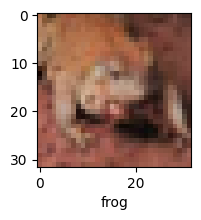

In [81]:
plot_sample(X_test,y_test,5)

## Evaluation

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.81      0.86      0.83      1000
           2       0.65      0.54      0.59      1000
           3       0.48      0.54      0.51      1000
           4       0.64      0.67      0.65      1000
           5       0.65      0.56      0.60      1000
           6       0.79      0.75      0.77      1000
           7       0.74      0.76      0.75      1000
           8       0.77      0.84      0.81      1000
           9       0.83      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



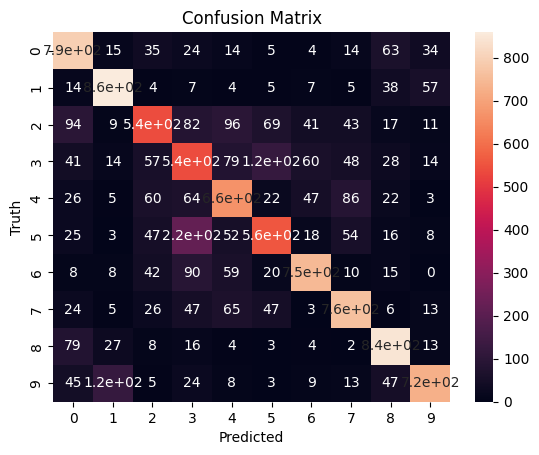

In [88]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()